<p>
Carlos Jaime<br>
1000847444<br>
INSY5375<br>
<br>
<br>
12.9.2019
<br>
</p>
<h1 align='center'>Individual Assignment</h1>
<hr>

<p>In this project, i used the following Supervised models for image classification:</p>
<ol>
    <li>Logistic</li>
    <li>SVM</li>
    <li>Nerual Neworks</li>
    <li>KNN</li>
    <li>Naive Bayes</li>
</ol>
    

<p>All 5 of my images were taken with an iphone 11 pro.<br>
   The images were then opened in photoshop and the backgrounds were removed using the magic wand tool.<br>
    I then applied a white background to all 5 images (more information below). </p>

<div class="box red" style="width:100%;height:15px;background:#00f"></div>
<h3>Fashion_mnist data:</h3>

In [1]:
#Here, i made my data ready before i applied different models.

import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
#changed range of the data 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
#reshaping train data into 1 dimension, flat the images
X_train_flat =  []


for x in X_train:
    X_train_flat.append(x.reshape(28*28))

    
X_train_flat= np.array(X_train_flat)
X_train_flat.shape

(60000, 784)

In [5]:
#reshaping test data into 1 dimension
X_test_flat =  []



for x in X_test:
    X_test_flat.append(x.reshape(28*28))

    
X_test_flat= np.array(X_test_flat)
X_test_flat.shape

(10000, 784)

In [6]:
print(X_train_flat.shape)
print(y_train.shape)
print('----')
print(X_test_flat.shape)
print(y_test.shape)

(60000, 784)
(60000,)
----
(10000, 784)
(10000,)


In [7]:
#reshaped the target variables
y_train.reshape(60000,1)
y_test.reshape(10000,1)

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

<div class="box red" style="width:100%;height:100px;background:#00f;text-align: center"><br>
    <h1 style="color:white">Task 1</h1>
</div> 

<div class="box red" style="width:50%;height:15px;background:#00f">
  
</div> 
<h3>Model 1: Logistic</h3>

In [8]:
X_test_flat_logistic = X_test_flat.copy()
X_train_flat_logistic = X_train_flat.copy()

y_test_logistic = y_test.copy()
y_train_logistic = y_train.copy()

In [9]:
# #model
# # Step 1
from sklearn.linear_model import LogisticRegression
# # Step 2
model_log = LogisticRegression(max_iter=10000)
# # Step 3
# #X_train, X_test, y_train, y_test = train_test_split(X_train_flat, y_train, test_size=0.3, random_state=0, stratify = y_train)
# # Step 4
model_log.fit(X_train_flat_logistic, y_train_logistic)
# # Step 5
y_test_hat_logistic = model_log.predict(X_test_flat_logistic)
y_train_hat_logistic = model_log.predict(X_train_flat_logistic)

In [10]:
from sklearn.metrics import accuracy_score
print('in sample:{}'.format(accuracy_score(y_train_logistic,y_train_hat_logistic, normalize = True) * 100 ))
print('out sample:{}'.format(accuracy_score(y_test_logistic,y_test_hat_logistic, normalize = True) * 100 ))

in sample:88.10833333333333
out sample:84.41


In [11]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

from sklearn.metrics import classification_report 
print(classification_report(y_test_logistic, y_test_hat_logistic, 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.93      0.93      0.93      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [13]:
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test_logistic, model_log.predict_proba(X_test_flat_logistic)[:], multi_class="ovr") 
print("AUC for log: {:.3f}".format(log_auc))

AUC for log: 0.983


<div class="box red" style="width:50%;height:15px;background:#00f">
  
</div> 
<h3>Model 2: SVM</h3>

In [14]:
X_test_flat_svm = X_test_flat.copy()
X_train_flat_svm = X_train_flat.copy()

y_test_svm = y_test.copy()
y_train_svm = y_train.copy()

In [15]:
#here i created a pipeline to handle the svc model and pca reduction
#i recuded the dimension to 150


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC




from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
# InitializeDimension Reduction model
pca = PCA(svd_solver='randomized', n_components=150, 
          whiten=True, random_state=0)

svc = SVC(probability=True)
# Create pipleline model
model_svm = make_pipeline(pca, svc)

In [16]:
model_svm.fit(X_train_flat_svm, y_train_svm)

Pipeline(steps=[('pca',
                 PCA(n_components=150, random_state=0, svd_solver='randomized',
                     whiten=True)),
                ('svc', SVC(probability=True))])

In [17]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

y_test_hat_svm = model_svm.predict(X_test_flat_svm)
y_train_hat_svm = model_svm.predict(X_train_flat_svm)

from sklearn.metrics import classification_report 
print(classification_report(y_test_svm, y_test_hat_svm, 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.81      0.82      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.82      0.82      0.82      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.73      0.68      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [18]:
#very good variance and bias
from sklearn.metrics import accuracy_score
print('out sample:{}'.format(accuracy_score(y_train_svm,y_train_hat_svm, normalize = True) * 100 ))
print('out sample:{}'.format(accuracy_score(y_test_svm,y_test_hat_svm, normalize = True) * 100 ))

out sample:95.42333333333333
out sample:89.46


In [19]:
#very good AUC
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, model_svm.predict_proba(X_test_flat_svm)[:], multi_class="ovr") 
print("AUC for log: {:.3f}".format(log_auc))

AUC for log: 0.992


<div class="box red" style="width:50%;height:15px;background:#00f">
  
</div> 
<h3>Model 3: Neural Network</h3>

In [20]:
X_test_flat_NN =  X_test_flat.copy()
X_train_flat_NN =  X_train_flat.copy()

y_test_NN = y_test.copy()
y_train_NN = y_train.copy()

In [21]:
#featured reduced to 20
from sklearn.decomposition import PCA
pca_1NN = PCA(svd_solver='randomized',n_components=20)                                    # Set the number of desired components
X_test_flat_NN = pca_1NN.fit_transform(X_test_flat_NN)     # Fit the PCA model
X_test_flat_NN.shape

from sklearn.decomposition import PCA
pca_2NN = PCA(svd_solver='randomized',n_components=20)                                    # Set the number of desired components
X_train_flat_NN = pca_2NN.fit_transform(X_train_flat_NN)     # Fit the PCA model
X_train_flat_NN.shape


(60000, 20)

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



model_NN = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[10,5])
model_NN.fit(X_train_flat_NN,y_train_NN)

# check the accuracy
y_train_hat_NN = model_NN.predict(X_train_flat_NN)
y_test_hat_NN = model_NN.predict(X_test_flat_NN)

in_sample_acc = accuracy_score(y_train,y_train_hat_NN, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat_NN, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
#Here, there seems to be a very serious problem with variance.
#I think its because neural netowrk is too complicated and therefore we are getting high variance?

In-sample Accuracy:  82.75666666666666
Out-of-sample Accuracy:  47.19


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


from sklearn.metrics import classification_report 
print(classification_report(y_test_NN, y_test_hat_NN, 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.67      0.61      0.64      1000
     Trouser       0.86      0.90      0.88      1000
    Pullover       0.49      0.24      0.32      1000
       Dress       0.52      0.62      0.57      1000
        Coat       0.54      0.32      0.40      1000
      Sandal       0.35      0.38      0.37      1000
       Shirt       0.15      0.18      0.17      1000
     Sneaker       0.43      0.68      0.53      1000
         Bag       0.58      0.79      0.67      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.45     10000
weighted avg       0.46      0.47      0.45     10000



In [24]:
#AUC score is ok
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, model_NN.predict_proba(X_test_flat_NN)[:], multi_class="ovr") 
print("AUC for log: {:.3f}".format(log_auc))

AUC for log: 0.787


<div class="box red" style="width:50%;height:15px;background:#00f">
  
</div> 
<h3>Model 4: KNN</h3>

In [25]:
X_test_flat_KNN = X_test_flat.copy()
X_train_flat_KNN = X_train_flat.copy()

y_test_KNN = y_test.copy()
y_train_KNN = y_train.copy()

In [26]:
X_test_flat_KNN.shape

(10000, 784)

In [27]:
from sklearn.decomposition import PCA
pca_KNN1 = PCA(svd_solver='randomized',n_components=40)                                    # Set the number of desired components
X_test_flat_KNN = pca_KNN1.fit_transform(X_test_flat_KNN)     # Fit the PCA model
X_test_flat_KNN.shape

pca_KNN2 = PCA(svd_solver='randomized', n_components=40)                                    # Set the number of desired components
X_train_flat_KNN = pca_KNN2.fit_transform(X_train_flat_KNN)     # Fit the PCA model
X_train_flat_KNN.shape  

(60000, 40)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [29]:
model_KNN = KNeighborsClassifier(n_neighbors=7)
model_KNN.fit(X_train_flat_KNN, y_train_KNN);

from sklearn.metrics import classification_report, confusion_matrix

y_train_hat_KNN = model_KNN.predict(X_train_flat_KNN)
y_test_hat_KNN = model_KNN.predict(X_test_flat_KNN)

In [30]:
#There seems to be a lot if variance here.
print('in sample:{}'.format(accuracy_score(y_train,y_train_hat_KNN, normalize = True) * 100 ))
print('out sample:{}'.format(accuracy_score(y_test,y_test_hat_KNN, normalize = True) * 100 ))

in sample:89.12166666666667
out sample:56.21000000000001


In [31]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


from sklearn.metrics import classification_report 
print(classification_report(y_test_KNN, y_test_hat_KNN, 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.65      0.73      0.69      1000
     Trouser       0.95      0.91      0.93      1000
    Pullover       0.39      0.37      0.38      1000
       Dress       0.62      0.72      0.67      1000
        Coat       0.47      0.57      0.52      1000
      Sandal       0.43      0.40      0.42      1000
       Shirt       0.28      0.17      0.21      1000
     Sneaker       0.59      0.82      0.69      1000
         Bag       0.80      0.91      0.85      1000
  Ankle boot       0.03      0.01      0.02      1000

    accuracy                           0.56     10000
   macro avg       0.52      0.56      0.54     10000
weighted avg       0.52      0.56      0.54     10000



In [1]:
#very good auc
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, model_KNN.predict_proba(X_test_flat_KNN)[:], multi_class="ovr") 
print("AUC for log: {:.3f}".format(log_auc))

NameError: name 'y_test' is not defined

<div class="box red" style="width:50%;height:15px;background:#00f">
  
</div> 
<h3>Model 5: Naive Bayes</h3>

In [141]:
X_test_flat_NB = X_test_flat.copy()
X_train_flat_NB = X_train_flat.copy()

y_test_NB = y_test.copy()
y_train_NB = y_train.copy()

In [142]:
#i reduced the amount of features to 140

pca_NB1 = PCA(svd_solver='randomized', n_components=140)                                    # Set the number of desired components
X_train_flat_NB = pca_NB1.fit_transform(X_train_flat_NB)     # Fit the PCA model
X_train_flat_NB.shape  

# from sklearn.manifold import Isomap
# iso = Isomap(n_components=45)
# X_train_flat = iso.fit_transform(X_train_flat)

(60000, 140)

In [143]:
#i reduced the amount of features to 140

pca_NB2 = PCA(svd_solver='randomized', n_components=140)                                    # Set the number of desired components
X_test_flat_NB = pca_NB2.fit_transform(X_test_flat_NB)     # Fit the PCA model
X_test_flat_NB.shape  

# from sklearn.manifold import Isomap
# iso = Isomap(n_components=45)
# X_train_flat = iso.fit_transform(X_train_flat)

(10000, 140)

In [144]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
model_NB = GaussianNB()
model_NB.fit(X_train_flat_NB, y_train_NB)



y_train_hat_NB = model_NB.predict(X_train_flat_NB)
y_test_hat_NB = model_NB.predict(X_test_flat_NB)

In [145]:
#here seems a lot of variance and bias here

from sklearn.metrics import accuracy_score
print('in sample:{}'.format(accuracy_score(y_train_NB,y_train_hat_NB, normalize = True) * 100 ))
print('out sample:{}'.format(accuracy_score(y_test_NB,y_test_hat_NB, normalize = True) * 100 ))

in sample:76.31166666666667
out sample:52.580000000000005


In [146]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


from sklearn.metrics import classification_report 
print(classification_report(y_test_NB, y_test_hat_NB, 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.46      0.73      0.57      1000
     Trouser       0.97      0.72      0.83      1000
    Pullover       0.27      0.16      0.20      1000
       Dress       0.74      0.56      0.64      1000
        Coat       0.48      0.58      0.53      1000
      Sandal       0.59      0.64      0.62      1000
       Shirt       0.23      0.26      0.24      1000
     Sneaker       0.80      0.69      0.74      1000
         Bag       0.46      0.84      0.59      1000
  Ankle boot       0.31      0.07      0.12      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.51     10000
weighted avg       0.53      0.53      0.51     10000



In [147]:
#auc score is very good but accuracy, precison and f1 is not very good
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, model_NB.predict_proba(X_test_flat_NB)[:], multi_class="ovr") 
print("AUC for log: {:.3f}".format(log_auc))

AUC for log: 0.876


<div class="box red" style="width:100%;height:100px;background:#00f;text-align: center"><br>
    <h1 style="color:white">Task 2</h1>
</div> 

In [99]:

#Here, im opening each of my images and coverting them to a Grayscale format, resizing and reshaping to a flat version.
#I then add all the images to X_experiment, so i can loop through the images later
import cv2
import numpy as np
X_experiment =  []




#image 1#
img = cv2.imread('shoes_clean.jpg')
res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
res = 255-res
img=res / 255

img = np.mean(img, axis=2)
X_experiment.append(img.reshape(28*28))





#image 2#
img = cv2.imread('shirt_1_clean.jpg')
res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
res = 255-res
img=res / 255

img = np.mean(img, axis=2)
X_experiment.append(img.reshape(28*28))
#     #print(x.reshape(28*28))






#image 3#
img = cv2.imread('shirt_2_clean.jpg')
res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
res = 255-res
img=res / 255

img = np.mean(img, axis=2)
X_experiment.append(img.reshape(28*28))



#image 4#
img = cv2.imread('trouser_clean.jpg')
res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
res = 255-res
img=res / 255

img = np.mean(img, axis=2)
X_experiment.append(img.reshape(28*28))





#image 5#
img = cv2.imread('pullover_clean.jpg')
res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
res = 255-res
img=res / 255

img = np.mean(img, axis=2)
#X_experiment.append(img.reshape(28*28))
X_experiment.append(img.reshape(28*28))




    
X_experiment= np.array(X_experiment)
X_experiment.shape


(5, 784)

<div class="box red" style="width:50%;height:15px;background:#00f">
  
</div> 
<h3>Pictures of my five fashion clothing items i took</h3>

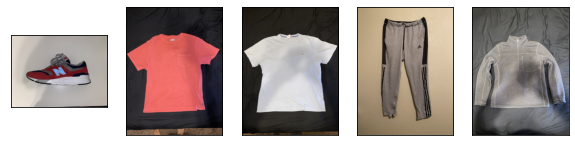

In [138]:
#here i create a list of the images names and then open all the images
#these are the orginal pictures i took, raw images

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
img=[]
filess = ['shoes','shirt1','shirt2','trouser','pullover']
for x in filess:
    #print(x+'.jpg')
    fashion_image = np.array(mpimg.imread('./original_images/'+x+'.jpg'))
    img.append(fashion_image)
    


#my images i took
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(img[i])
    #axi.set_title(class_names[my_label[i]])
    axi.set(xticks=[], yticks=[])

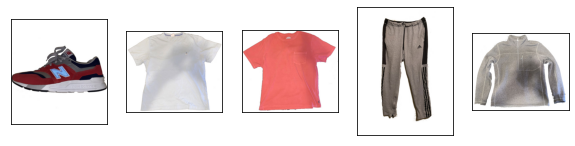

In [135]:
#the previous images were then opened in photoshop and the bacgkround was removed
#here i view the new images exported from photoshop with a new white bacgrkound
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
img=[]
filess = ['shoes_clean','shirt_1_clean','shirt_2_clean','trouser_clean','pullover_clean']
for x in filess:
    #print(x+'.jpg')
    fashion_image = np.array(mpimg.imread(x+'.jpg'))
    img.append(fashion_image)
    




#my images i took
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(img[i])
    #axi.set_title(class_names[my_label[i]])
    axi.set(xticks=[], yticks=[])

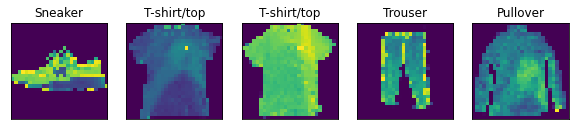

In [140]:
#here, i loop through the images and view them in the same manner the fashion_mnist images were shown before
my_label =  [7,0,0,1,2]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_experiment[i].reshape(28,28))
    axi.set_title(class_names[my_label[i]])
    axi.set(xticks=[], yticks=[])

In [102]:
# here i create a list containing all the labels for my images
#example 7, standers for a sneaker, and its in the same position as X_experiment shoe image
import numpy as np
#the categories my images belong with
#
y_experiment =  [7,0,0,1,2]
#

In [103]:
X_experiment.shape

(5, 784)

<div class="box red" style="width:50%;height:15px;background:#00f">
  
</div> 
<h3>Using Logistic for image classification</h3>

In [104]:
#logistic model image classification
y_hat_experiment = model_log.predict(X_experiment)


from sklearn.metrics import accuracy_score
print('score:{}'.format(accuracy_score(y_experiment,y_hat_experiment, normalize = True) * 100 ))

score:80.0


In [ ]:
#logistic model was able to identify 4 of my 5 images. 80% accuracy
#the image it could not classify corectly was a pullover that looks like a tshirt,
#it was able to classify the pullover as a tshirt.

In [149]:
#svm model image classification
y_hat_experiment = model_svm.predict(X_experiment)


from sklearn.metrics import accuracy_score
print('score:{}'.format(accuracy_score(y_experiment,y_hat_experiment, normalize = True) * 100 ))

score:40.0


<div class="box red" style="width:100%;height:100px;background:#00f;text-align: center"><br>
    <h1 style="color:white">Extra</h1>
</div> 

<P>I decided to try different ways to make the KNN model better with less train and test data.</p>

<p>
Previously, KNN had very high variance and could suffer from overfitting, lots of variables and complexity issues.
I decided to draw a validation curve to see how the model perform with different hyperparameters.
I then decided to use gridsearch/stratifiedfold to see what it chooses as the best hyperparameters.
By comparing these this new model and the old model found above. This new version performed much better.
</p>

<p>
    <b>Previously</b>:<br>
KNN<br>
in sample accuracy: 89%<br>
out of sample accuracy: 52%<br>
This model had 37% variance and 11% bias.<br>
The AUC score was 0.822<br>


<b>new</b>:<br>
KNN    <br>
now with the new changes below*<br>

in sample accuracy: 85%<br>
out of sample accuracy: 69%<br>
This model had 15% variance and 16% bias.<br>
The AUC score was 0.945<br>
</p>

<br>
<p>variance decreased by 22%, bias increased by 4% and AUC incrased by 12%</p>

In [8]:
X_test_flat_KNN2 = X_test_flat[:5000].copy()
X_train_flat_KNN2 = X_train_flat[:15000].copy()

y_test_KNN2 = y_test[:5000].copy()
y_train_KNN2 = y_train[:15000].copy()

In [9]:
from sklearn.decomposition import PCA
pca_KNN1 = PCA(svd_solver='randomized',n_components=40)                                    # Set the number of desired components
X_test_flat_KNN2 = pca_KNN1.fit_transform(X_test_flat_KNN2)     # Fit the PCA model
X_test_flat_KNN2.shape

pca_KNN2 = PCA(svd_solver='randomized', n_components=40)                                    # Set the number of desired components
X_train_flat_KNN2 = pca_KNN2.fit_transform(X_train_flat_KNN2)     # Fit the PCA model
X_train_flat_KNN2.shape  

(15000, 40)

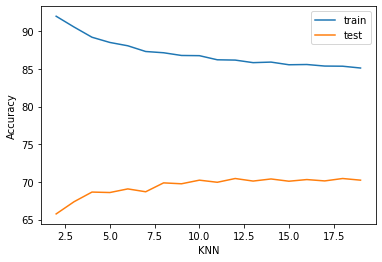

In [10]:
#graphing accuracy scores based on hyperparameters neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
n = range(2,20)
score_train = []
score_test = []


for i in n:
    model = model = KNeighborsClassifier(n_neighbors=i).fit(X_train_flat_KNN2, y_train_KNN2)
    y_train_hat_KNN2  = model.predict(X_train_flat_KNN2)
    y_test_hat_KNN2  = model.predict(X_test_flat_KNN2)
    
    score_train.append(accuracy_score(y_train_KNN2,y_train_hat_KNN2, normalize = True) * 100 )
    score_test.append(accuracy_score(y_test_KNN2,y_test_hat_KNN2, normalize = True) * 100 )

    
plt.plot(n,  score_train, label='train')
plt.plot(n,  score_test, label='test')
plt.xlabel("KNN")
plt.ylabel("Accuracy")
plt.legend()




<p>The variance seems to decrease when i use higher knn. The sweet spot seems to be between 7.5 and 12<br>
    Next i will run gridsearch to find out the best.
</p>

In [11]:
KNN_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [5,6,7,8,9,10,15]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_train_flat_KNN2, y_train_KNN2)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 9}
Best Cross Vlidation Score: 0.8374


In [12]:
bestModel = grid.best_estimator_
y_test_hat_KNN2 = bestModel.predict(X_test_flat_KNN2)

In [13]:
print('in sample:{}'.format(accuracy_score(y_train_KNN2,y_train_hat_KNN2, normalize = True) * 100 ))
print('out sample:{}'.format(accuracy_score(y_test_KNN2,y_test_hat_KNN2, normalize = True) * 100 ))

in sample:85.12666666666667
out sample:69.76


In [15]:
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test_KNN2, model.predict_proba(X_test_flat_KNN2)[:], multi_class="ovr") 
print("AUC for log: {:.3f}".format(log_auc))

AUC for log: 0.945
